# Introduction

We have seen how to train our CNNs with a number of specified layers and hyperparameters, and we have also seen examples of some state of the art CNN architectures like VGG and ResNet. These are the result of careful experimentation with many architectures and extensive hyperparameter tuning. They have been trained on the very large ImageNet database, which has 1000 object classes. 

This training data is so large and the models have so many parameters that training models like thses often takes weeks even on multiple GPUs. So, it would be ideal if we could find a way to use what these models have already learned, and apply that knowledge to a new task. For example, say we have some images we want to classify like those in the CIFAR dataset. Instead of constructing a CNN from scratch, can we instead take the knowledge from a trained CNN like ResNet, and use it to help classify the set of images. Yes, we can, and this is best accomplished through a technique called transfer learning. 

Transfer learning is all about how to use a pre-trained network and apply it to a task of our own design, transferring what it is learned from one task to another. There are a few ways to implement transfer learning, and our approach will depend on how similar a dataset is to the dataset that a pre-trained network has seen. In other words, how transferable can certain knowledge be? We will answer this question and go over different strategies for transfer learning, and we will learn how to implement transfer learning in code using a pre-trained network to help classify different sets of images. 


# Useful layers

Let's take our example of the VGG network. How can we take the CNN that's been trained to classify a thousand ImageNet images and apply this to a new problem? What if we wanted to classify images of different flower types? Like sunflowers versus daisies, and so on. 

While VGG has learned to distinguish between the thousand different categories that are present in ImageNet, most of those categories are animals,fruits and vegetables, or everyday objects. Is VGG trained each of its convolutional layers learn to extract some information about the shapes and colors that distinguish these different objects? In fact, we know that the convolutional filters in a trained CNN are arranged in a kind of hierarchy. The filter in the first layer often detect edges or blocks of color. The second layer might detect circles, stripes, and rectangules. These are still very general features that are useful in analizing any image in almost any dataset. The filters in the final convolutional layers are much more specific. If they were birds in the training dataset, there are filters that can detect birds. If they were cars or bicycles, there are filters to detect wheels and so on. 

We will see then that it is useful to remove the final layers of the network that are very specific to the training dataset while keeping the earlier layers. In this way, we can use the convolutional and pooling layers in a pre-trained network like VGG is a feature extractor that identifies shape and color-based features in our set of flower images. Then, after an image has passed through this pre-trainined feature extractor, we can add one or two more linear layers at the end, which can act as a final classifier. These last layers take in the features from an image and we can train only these final layers to customize this network for a new task. So, even if the image database that we are interested in for flower images has no overlap with the ImageNet categories, it is still possible to use the knowledge from a pre-trained CNN. 

This is one technique for transfer learning, but our method will depend on both the size of our dataset and the level of similarity it shares with the ImageNet database. For instance, this technique of adding some final trainable classifier layers will work well if our dataset is relatively small and has distinct shape features that are similar to those found in the ImageNet database. If our dataset is very large and different than ImageNet, we may take a different approach. 

Let's go over one more approach to transfer learning.

How might we use transfer learning if the data we want to work with is very large and somewhat different than that found in the ImageNet database? As an example, I should mention that one of Udacity founders, Sebastian Thrun, along with a team at Standford, recently used transfer learning to develop a CNN to diagnose skin cancer. The CNN classifies lesions as either benign or malignant and achieves performance on par with dermatologists for diagnosing some forms of skin cancer.  To construct his model,  he used a tranfer learning approach with the inception architecture, pre-trained on the ImageNet database. 

As a first step, he removed the final densely connected classification layer and added a new fully-connected layer. This is similar to the approach that we outlined before, adding a new classification layer with an output size that we define. In this case, this layer has an output value for each type of disease class. 

As for all the other layers in the network, their parameters were initialized with pre-trained values. Then, during training, the parameters were further optimized to fit the database of skin lesions. So, instead of using the pre-trained model as a fixed feature extractor, Sebastian and his team used it as a starting point and then trained to the entire network, modifying all the weights such that they were tuned to the medical image classification task. 

In this case, the model truly benefited from the head start that it was given from pre-training on ImageNet. 

This is just another kind of transfer learning. This technique is called fine tuning because it requires slightly changing or tunning all the existing parameters in a pre-trained network. Fine-tunning often works best if the data set we are interested in is quite large. Transfer learning is an extremely useful technique, but we should apply it differently based on how big and how similar our dataset is to the data that a pretrained model has seen. 

As always, we encourage to experiment with different methods, and we will find more guidance on how to use transfer learning in a variety of scenarios.

The approach for using transfer learning will be different. There are four main cases:

- New data set is small, new data is similar to original training data.
- New data set is small, new data is different from original training data.
- New data set is large, new data is similar to original training data.
- New data set is large, new data is different from original training data.

A large data set might have one million images. A small data could have two-thousand images. The dividing line between a large data set and small data set is somewhat subjective. Overfitting is a concern when using transfer learning with a small data set.

Images of dogs and images of wolves would be considered similar; the images would share common characteristics. A data set of flower images would be different from a data set of dog images.

Each of the four transfer learning cases has its own approach. We will look at each case one by one.

The graph below displays what approach is recommended for each of the four main cases.
<img src="assets/GuideForTransferLearning.png">
Four cases for using tranfer learning

### Demonstration Network

To explain how each situation works, we will start with a generic pre-trained convolutional neural network and explain how to adjust the network for each case. Our example network contains three convolutional layers and three fully connected layers:

<img src="assets/pretrainedNeuralNet.png">
Overview of the layers of a pre-trained CNN

Here is an generalized overview of what the convolutional neural network does:

- the first layer will detect edges in the image
- the second layer will detect shapes
- the third convolutional layer detects higher level features

Each transfer learning case will use the pre-trained convolutional neural network in a different way.

### Case 1: Small Data Set, Similar Data

<img src="assets/Case1.png">

If the new data set is small and similar to the original training data:

- slice off the end of the neural network
- add a new fully connected layer that matches the number of classes in the new data set
- randomize the weights of the new fully connected layer; freeze all the weights from the pre-trained network
- train the network to update the weights of the new fully connected layer

To avoid overfitting on the small data set, the weights of the original network will be held constant rather than re-training the weights.

Since the data sets are similar, images from each data set will have similar higher level features. Therefore most or all of the pre-trained neural network layers already contain relevant information about the new data set and should be kept.

Here's how to visualize this approach:

<img src="assets/Case1path.png">
Adding and training a fully connected layer at the end of the NN

### Case 2: Small Data Set, Different Data

<img src="assets/Case2.png">
Case 2: small set, different data

If the new data set is small and different from the original training data:

- slice off all but some of the pre-trained layers near the beginning of the network
- add to the remaining pre-trained layers a new fully connected layer that matches the number of classes in the new data set
- randomize the weights of the new fully connected layer; freeze all the weights from the pre-trained network
- train the network to update the weights of the new fully connected layer

Because the data set is small, overfitting is still a concern. To combat overfitting, the weights of the original neural network will be held constant, like in the first case.

But the original training set and the new data set do not share higher level features. In this case, the new network will only use the layers containing lower level features.

Here is how to visualize this approach:

<img src="assets/Case2path.png">
Remove all but starting layers of the model, and add and train a linear layer at the end.

### Case 3: Large Data Set, Similar data

<img src="assets/Case3.png">
Case 3: large data, similar to ImageNet or pre-trained set.

If the new data set is large and similar to the original training data:

- remove the last fully connected layer and replace with a layer matching the number of classes in the new data set
- randomly initialize the weights in the new fully connected layer
- initialize the rest of the weights using the pre-trained weights
- re-train the entire neural network

Overfitting is not as much of a concern when training on a large data set; therefore, you can re-train all of the weights.

Because the original training set and the new data set share higher level features, the entire neural network is used as well.

Here is how to visualize this approach:

<img src="assets/Case3path.png">
Utilizing pre-trained weights as starting point!

### Case 4: Large Data Set, Different Data

<img src="assets/Case4.png">
Case 4: large data, different than original dataset

If the new data set is large and different from the original training data:

- remove the last fully connected layer and replace with a layer matching the number of classes in the new data set
- retrain the network from scratch with randomly initialized weights
- alternatively, you could just use the same strategy as the "large and similar" data case

Even though the data set is different from the training data, initializing the weights from the pre-trained network might make training faster. So this case is exactly the same as the case with a large, similar data set.

If using the pre-trained network as a starting point does not produce a successful model, another option is to randomly initialize the convolutional neural network weights and train the network from scratch.

Here is how to visualize this approach:

<img src="assets/Case4path.png">
Fine-tune or retrain entire network

We can also check out this [research paper](https://arxiv.org/pdf/1411.1792.pdf) that systematically analyzes the transferability of features learned in pre-trained CNNs. Also we can read the [Nature publication](http://www.nature.com/articles/nature21056.epdf?referrer_access_token=_snzJ5POVSgpHutcNN4lEtRgN0jAjWel9jnR3ZoTv0NXpMHRAJy8Qn10ys2O4tuP9jVts1q2g1KBbk3Pd3AelZ36FalmvJLxw1ypYW0UxU7iShiMp86DmQ5Sh3wOBhXDm9idRXzicpVoBBhnUsXHzVUdYCPiVV0Slqf-Q25Ntb1SX_HAv3aFVSRgPbogozIHYQE3zSkyIghcAppAjrIkw1HtSwMvZ1PXrt6fVYXt-dvwXKEtdCN8qEHg0vbfl4_m&tracking_referrer=edition.cnn.com) detailing Sebastian Thrun's cancer-detecting CNN.

# Transfer Learning

Most of the time you won't want to train a whole convolutional network yourself. Modern ConvNets training on huge datasets like ImageNet take weeks on multiple GPUs. 
> Instead, most people use a pretrained network either as a fixed feature extractor, or as an initial network to fine tune. 

In this notebook, you'll be using [VGGNet](https://arxiv.org/pdf/1409.1556.pdf) trained on the [ImageNet dataset](http://www.image-net.org/) as a feature extractor. Below is a diagram of the VGGNet architecture, with a series of convolutional and maxpooling layers, then three fully-connected layers at the end that classify the 1000 classes found in the ImageNet database.

<img src="assets/vgg_16_architecture.png" width=700px>

VGGNet is great because it's simple and has great performance, coming in second in the ImageNet competition. The idea here is that we keep all the convolutional layers, but **replace the final fully-connected layer** with our own classifier. This way we can use VGGNet as a _fixed feature extractor_ for our images then easily train a simple classifier on top of that. 
* Use all but the last fully-connected layer as a fixed feature extractor.
* Define a new, final classification layer and apply it to a task of our choice!

You can read more about transfer learning from [the CS231n Stanford course notes](http://cs231n.github.io/transfer-learning/).

---

## Flower power

Here we'll be using VGGNet to classify images of flowers. We'll start, as usual, by importing our usual resources. And checking if we can train our model on GPU.

### Download Data

Download the flower data from [this link](https://s3.amazonaws.com/video.udacity-data.com/topher/2018/September/5baa60a0_flower-photos/flower-photos.zip), save it in the home directory of this notebook and extract the zip file to get the directory `flower_photos/`. **Make sure the directory has this exact name for accessing data: flower_photos**.

In [1]:
import os
import numpy as np
import torch

import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# check if CUDA is available
train_on_gpu = torch.cuda.is_available()

if not train_on_gpu:
    print('CUDA is not available.  Training on CPU ...')
else:
    print('CUDA is available!  Training on GPU ...')

CUDA is not available.  Training on CPU ...


## Load and Transform our Data

We'll be using PyTorch's [ImageFolder](https://pytorch.org/docs/stable/torchvision/datasets.html#imagefolder) class which makes it very easy to load data from a directory. For example, the training images are all stored in a directory path that looks like this:
```
root/class_1/xxx.png
root/class_1/xxy.png
root/class_1/xxz.png

root/class_2/123.png
root/class_2/nsdf3.png
root/class_2/asd932_.png
```

Where, in this case, the root folder for training is `flower_photos/train/` and the classes are the names of flower types.

In [3]:
# define training and test data directories
data_dir = 'flower_photos/'
train_dir = os.path.join(data_dir, 'train/')
test_dir = os.path.join(data_dir, 'test/')

# classes are folders in each directory with these names
classes = ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

### Transforming the Data

When we perform transfer learning, we have to shape our input data into the shape that the pre-trained model expects. VGG16 expects `224`-dim square images as input and so, we resize each flower image to fit this mold.

In [4]:
# load and transform data using ImageFolder

# VGG-16 Takes 224x224 images as input, so we resize all of them
data_transform = transforms.Compose([transforms.RandomResizedCrop(224), 
                                      transforms.ToTensor()])

train_data = datasets.ImageFolder(train_dir, transform=data_transform)
test_data = datasets.ImageFolder(test_dir, transform=data_transform)

# print out some data stats
print('Num training images: ', len(train_data))
print('Num test images: ', len(test_data))

Num training images:  3130
Num test images:  540


### DataLoaders and Data Visualization

In [5]:
# define dataloader parameters
batch_size = 20
num_workers=0

# prepare data loaders
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, 
                                           num_workers=num_workers, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, 
                                          num_workers=num_workers, shuffle=True)

/Users/mb78200/opt/anaconda3/envs/my_p3_env/lib/python3.7/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  # This is added back by InteractiveShellApp.init_path()


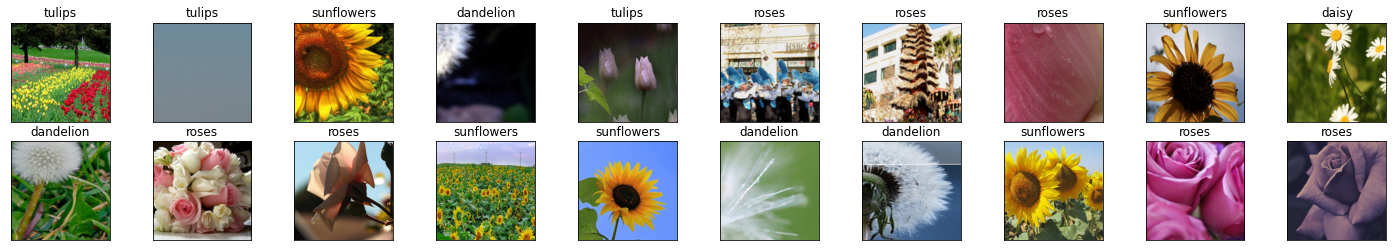

In [6]:
# Visualize some sample data

# obtain one batch of training images
dataiter = iter(train_loader)
images, labels = dataiter.next()
images = images.numpy() # convert images to numpy for display

# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    plt.imshow(np.transpose(images[idx], (1, 2, 0)))
    ax.set_title(classes[labels[idx]])

---
## Define the Model

To define a model for training we'll follow these steps:
1. Load in a pre-trained VGG16 model
2. "Freeze" all the parameters, so the net acts as a fixed feature extractor 
3. Remove the last layer
4. Replace the last layer with a linear classifier of our own

**Freezing simply means that the parameters in the pre-trained model will *not* change during training.**

In [7]:
# Load the pretrained model from pytorch
vgg16 = models.vgg16(pretrained=True)

# print out the model structure
print(vgg16)

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /Users/mb78200/.cache/torch/checkpoints/vgg16-397923af.pth
100.0%


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [8]:
print(vgg16.classifier[6].in_features) 
print(vgg16.classifier[6].out_features) 

4096
1000


In [9]:
# Freeze training for all "features" layers
for param in vgg16.features.parameters():
    param.requires_grad = False

Freezing parameters
To freeze any parameters, you can use the variable requires_grad. By default this is set to True. To freeze existing parameters you can loop through each one and set `param.requires_grad = False.`

Above we are iterating in features of the vgg16 model, frezing these weights and they will stay at their pre-trained values. 

---
### Final Classifier Layer

Once you have the pre-trained feature extractor, you just need to modify and/or add to the final, fully-connected classifier layers. In this case, we suggest that you repace the last layer in the vgg classifier group of layers. 
> This layer should see as input the number of features produced by the portion of the network that you are not changing, and produce an appropriate number of outputs for the flower classification task.

You can access any layer in a pretrained network by name and (sometimes) number, i.e. `vgg16.classifier[6]` is the sixth layer in a group of layers named "classifier".

In [10]:
import torch.nn as nn
## TODO: add a last linear layer  that maps n_inputs -> 5 flower classes
## new layers automatically have requires_grad = True

n_inputs = vgg16.classifier[6].in_features

last_layer = nn.Linear(n_inputs, len(classes))

vgg16.classifier[6] = last_layer

# after completing your model, if GPU is available, move the model to GPU
if train_on_gpu:
    vgg16.cuda()
    
# check to see that your last layer produces the expected number of outputs
print(vgg16.classifier[6].out_features)

5


### Specify [Loss Function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [Optimizer](http://pytorch.org/docs/stable/optim.html)

Below we'll use cross-entropy loss and stochastic gradient descent with a small learning rate. Note that the optimizer accepts as input _only_ the trainable parameters `vgg.classifier.parameters()`.

In [11]:
import torch.optim as optim

# specify loss function (categorical cross-entropy)
criterion = nn.CrossEntropyLoss()

# specify optimizer (stochastic gradient descent) and learning rate = 0.001
optimizer = optim.SGD(vgg16.classifier.parameters(), lr=0.001)

---
## Training

Here, we'll train the network.

In [14]:
# number of epochs to train the model
n_epochs = 2

## TODO complete epoch and training batch loops
## These loops should update the classifier-weights of this model
## And track (and print out) the training loss over time

for epoch in range(1, n_epochs+1):
    # keep track of training and validation loss
    train_loss = 0.0
    
    # model by default is set to train
    for batch_n, (data, target) in enumerate(train_loader):
        # move tensors to GPU if CUDA is available
        if train_on_gpu:
            data, target = data.cuda(), target.cuda()
        # clear the gradients of all optimized variables
        optimizer.zero_grad()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = vgg16(data)
        # calculate the batch loss
        loss = criterion(output, target)
        # backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # perform a single optimization step (parameter update)
        optimizer.step()
        # update training loss 
        train_loss += loss.item()
        
        if batch_n % 20 == 19:    # print training loss every specified number of mini-batches
            print('Epoch %d, Batch %d loss: %.16f' %
                  (epoch, batch_n + 1, train_loss / 20))
            train_loss = 0.0

Epoch 1, Batch 20 loss: 1.5399394869804381
Epoch 1, Batch 40 loss: 1.3663613677024842
Epoch 1, Batch 60 loss: 1.2124834537506104
Epoch 1, Batch 80 loss: 1.1758379459381103
Epoch 1, Batch 100 loss: 1.0818926125764847
Epoch 1, Batch 120 loss: 0.9955928683280945
Epoch 1, Batch 140 loss: 0.9500468254089356
Epoch 2, Batch 20 loss: 0.8507192403078079
Epoch 2, Batch 40 loss: 0.8232381492853165
Epoch 2, Batch 60 loss: 0.8380328595638276
Epoch 2, Batch 80 loss: 0.7950138330459595
Epoch 2, Batch 100 loss: 0.8435465216636657
Epoch 2, Batch 120 loss: 0.8087306737899780
Epoch 2, Batch 140 loss: 0.8104598015546799


---
## Testing

Below you see the test accuracy for each flower class.

In [15]:
# track test loss 
# over 5 flower classes
test_loss = 0.0
class_correct = list(0. for i in range(5))
class_total = list(0. for i in range(5))

vgg16.eval() # eval mode

# iterate over test data
for data, target in test_loader:
    # move tensors to GPU if CUDA is available
    if train_on_gpu:
        data, target = data.cuda(), target.cuda()
    # forward pass: compute predicted outputs by passing inputs to the model
    output = vgg16(data)
    # calculate the batch loss
    loss = criterion(output, target)
    # update  test loss 
    test_loss += loss.item()*data.size(0)
    # convert output probabilities to predicted class
    _, pred = torch.max(output, 1)    
    # compare predictions to true label
    correct_tensor = pred.eq(target.data.view_as(pred))
    correct = np.squeeze(correct_tensor.numpy()) if not train_on_gpu else np.squeeze(correct_tensor.cpu().numpy())
    # calculate test accuracy for each object class
    for i in range(batch_size):
        label = target.data[i]
        class_correct[label] += correct[i].item()
        class_total[label] += 1

# calculate avg test loss
test_loss = test_loss/len(test_loader.dataset)
print('Test Loss: {:.6f}\n'.format(test_loss))

for i in range(5):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            classes[i], 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))

Test Loss: 0.703448

Test Accuracy of daisy: 78% (72/92)
Test Accuracy of dandelion: 93% (123/132)
Test Accuracy of roses: 59% (54/91)
Test Accuracy of sunflowers: 75% (76/101)
Test Accuracy of tulips: 68% (85/124)

Test Accuracy (Overall): 75% (410/540)


### Visualize Sample Test Results

/Users/mb78200/opt/anaconda3/envs/my_p3_env/lib/python3.7/site-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.


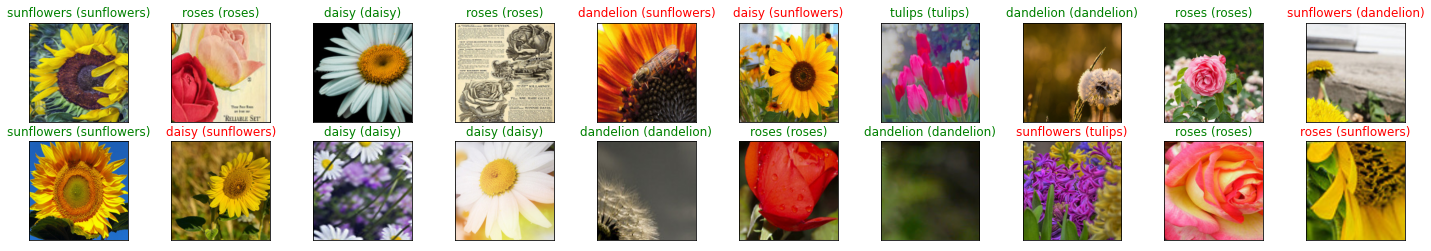

In [16]:
# obtain one batch of test images
dataiter = iter(test_loader)
images, labels = dataiter.next()
images.numpy()

# move model inputs to cuda, if GPU available
if train_on_gpu:
    images = images.cuda()

# get sample outputs
output = vgg16(images)
# convert output probabilities to predicted class
_, preds_tensor = torch.max(output, 1)
preds = np.squeeze(preds_tensor.numpy()) if not train_on_gpu else np.squeeze(preds_tensor.cpu().numpy())

# plot the images in the batch, along with predicted and true labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    plt.imshow(np.transpose(images[idx], (1, 2, 0)))
    ax.set_title("{} ({})".format(classes[preds[idx]], classes[labels[idx]]),
                 color=("green" if preds[idx]==labels[idx].item() else "red"))